# 請結合前面的知識與程式碼，比較不同的 optimizer 與 learning rate 組合對訓練的結果與影響
### 常見的 optimizer 包含
* SGD
* RMSprop
* AdaGrad
* Adam

In [ ]:
SGD
    0.1, loss: 1.2413 - acc: 0.5588 - val_loss: 1.4547 - val_acc: 0.4948
RMSprop
    0.001, loss: 1.2460 - acc: 0.5553 - val_loss: 1.6130 - val_acc: 0.4514
    0.0001, loss: 1.2937 - acc: 0.5472 - val_loss: 1.3780 - val_acc: 0.5144
AdaGrad
    0.001, loss: 1.4054 - acc: 0.5098 - val_loss: 1.4765 - val_acc: 0.4723
Adam
    0.001, loss: 1.1341 - acc: 0.5953 - val_loss: 1.3406 - val_acc: 0.5294

In [1]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [8]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    """
    Build your own model
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [9]:
## 超參數設定
"""
Set your required experiment parameters
"""
LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4]
EPOCHS = 20
BATCH_SIZE = 256
MOMENTUM = 0.95


In [11]:
results = {}
"""
建立你的訓練與實驗迴圈並蒐集資料
"""
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.Adam(lr=lr)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

W0807 13:33:26.075191 13272 module_wrapper.py:136] From C:\Users\User\Anaconda3\lib\site-packages\tensorflow_core\python\util\module_wrapper.py:163: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0807 13:33:26.134034 13272 deprecation.py:323] From C:\Users\User\Anaconda3\lib\site-packages\tensorflow_core\python\ops\math_grad.py:1423: where (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Experiment with LR = 0.100000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [============================

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 5s 105us/step - loss: 1.9414 - acc: 0.3042 - val_loss: 1.7387 - val_acc: 0.3881
Epoch 2/20
50000/50000 [==============================] - 5s 100us/step - loss: 1.7067 - acc: 0.3914 - val_loss: 1.6353 - val_acc: 0.4230
Epoch 3/20
50000/50000 [==============================] - 5s 100us/step - loss: 1.6095 - acc: 0.4251 - val_loss: 1.5766 - val_acc: 0.4327
Epoch 4/20
50000/50000 [==============================] - 5s 100us/step - loss: 1.5472 - acc: 0.4463 - val_loss: 1.5133 - val_acc: 0.4663
Epoch 5/20
50000/50000 [==============================] - 5s 100us/step - loss: 1.5031 - acc: 0.4645 - val_loss: 1.4877 - val_acc: 0.4737
Epoch 6/20
50000/50000 [==============================] - 5s 100us/step - loss: 1.4599 - acc: 0.4803 - val_loss: 1.4991 - val_acc: 0.4742
Epoch 7/20
50000/50000 [==============================] - 5s 101us/step - loss: 1.4378 - acc: 0.4884 - val_loss: 1.4714 - 

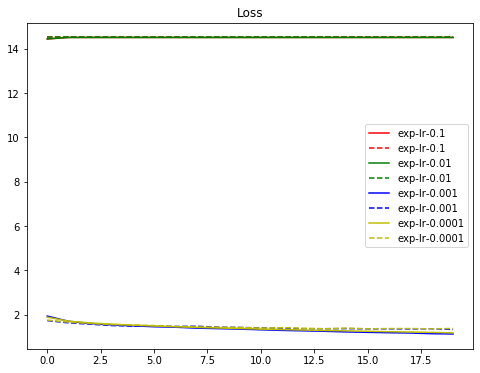

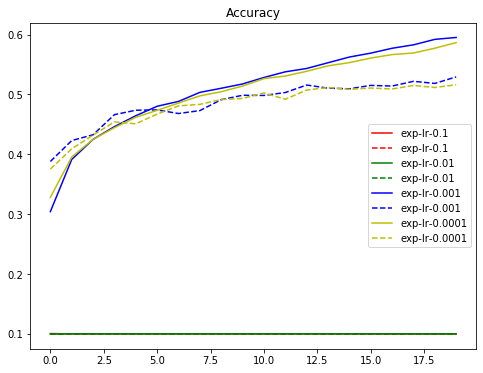

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

"""
將實驗結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

In [13]:
LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4]
EPOCHS = 20
BATCH_SIZE = 256

In [15]:
results = {}
"""
建立你的訓練與實驗迴圈並蒐集資料
"""
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.Adagrad(lr=lr)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with LR = 0.100000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [============================

50000/50000 [==============================] - 4s 83us/step - loss: 1.9862 - acc: 0.2819 - val_loss: 1.8885 - val_acc: 0.3281
Epoch 2/20
50000/50000 [==============================] - 4s 80us/step - loss: 1.7937 - acc: 0.3662 - val_loss: 1.7533 - val_acc: 0.3823
Epoch 3/20
50000/50000 [==============================] - 4s 80us/step - loss: 1.7210 - acc: 0.3933 - val_loss: 1.7193 - val_acc: 0.3855
Epoch 4/20
50000/50000 [==============================] - 4s 80us/step - loss: 1.6667 - acc: 0.4149 - val_loss: 1.7375 - val_acc: 0.3765
Epoch 5/20
50000/50000 [==============================] - 4s 79us/step - loss: 1.6301 - acc: 0.4286 - val_loss: 1.6201 - val_acc: 0.4274
Epoch 6/20
50000/50000 [==============================] - 4s 80us/step - loss: 1.5967 - acc: 0.4388 - val_loss: 1.6098 - val_acc: 0.4272
Epoch 7/20
50000/50000 [==============================] - 4s 80us/step - loss: 1.5741 - acc: 0.4492 - val_loss: 1.5951 - val_acc: 0.4304
Epoch 8/20
50000/50000 [============================

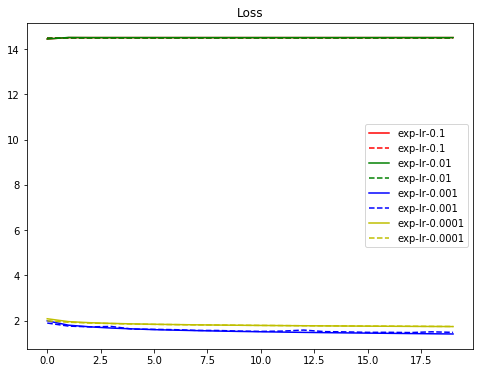

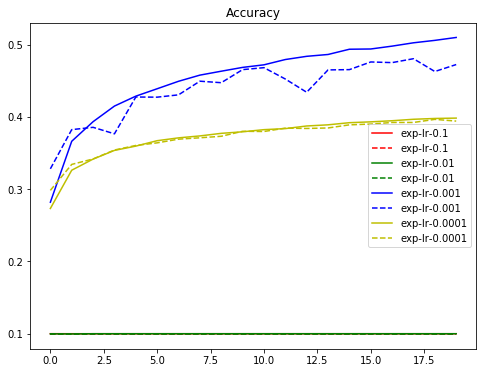

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

"""
將實驗結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

In [17]:
LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4]
EPOCHS = 20
BATCH_SIZE = 256

In [18]:
results = {}
"""
建立你的訓練與實驗迴圈並蒐集資料
"""
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.RMSprop(lr=lr)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with LR = 0.100000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [============================

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 5s 91us/step - loss: 2.3527 - acc: 0.2074 - val_loss: 1.9217 - val_acc: 0.3009
Epoch 2/20
50000/50000 [==============================] - 5s 91us/step - loss: 1.9028 - acc: 0.3116 - val_loss: 1.8677 - val_acc: 0.3202
Epoch 3/20
50000/50000 [==============================] - 4s 88us/step - loss: 1.7826 - acc: 0.3602 - val_loss: 1.8025 - val_acc: 0.3630
Epoch 4/20
50000/50000 [==============================] - 4s 88us/step - loss: 1.7174 - acc: 0.3868 - val_loss: 1.6771 - val_acc: 0.3851
Epoch 5/20
50000/50000 [==============================] - 4s 87us/step - loss: 1.6606 - acc: 0.4054 - val_loss: 1.7255 - val_acc: 0.3937
Epoch 6/20
50000/50000 [==============================] - 4s 88us/step - loss: 1.6131 - acc: 0.4201 - val_loss: 1.6063 - val_acc: 0.4222
Epoch 7/20
50000/50000 [==============================] - 4s 87us/step - loss: 1.5759 - acc: 0.4394 - val_loss: 1.6864 - val_acc

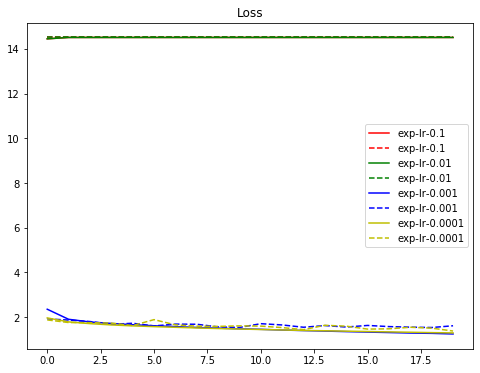

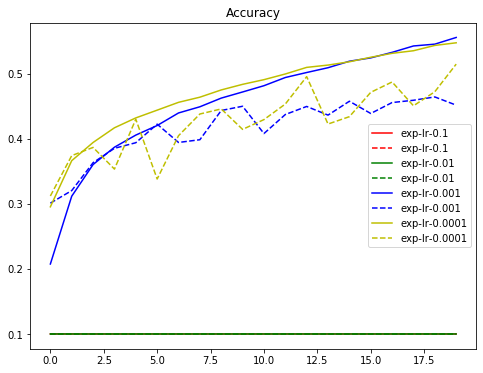

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

"""
將實驗結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

In [20]:
LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4]
EPOCHS = 20
BATCH_SIZE = 256

In [21]:
results = {}
"""
建立你的訓練與實驗迴圈並蒐集資料
"""
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=lr)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with LR = 0.100000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [============================

50000/50000 [==============================] - 4s 74us/step - loss: 2.2841 - acc: 0.1507 - val_loss: 2.2321 - val_acc: 0.1989
Epoch 2/20
50000/50000 [==============================] - 4s 71us/step - loss: 2.1977 - acc: 0.2173 - val_loss: 2.1678 - val_acc: 0.2301
Epoch 3/20
50000/50000 [==============================] - 4s 70us/step - loss: 2.1413 - acc: 0.2439 - val_loss: 2.1183 - val_acc: 0.2518
Epoch 4/20
50000/50000 [==============================] - 4s 71us/step - loss: 2.0941 - acc: 0.2624 - val_loss: 2.0738 - val_acc: 0.2729
Epoch 5/20
50000/50000 [==============================] - 4s 71us/step - loss: 2.0515 - acc: 0.2773 - val_loss: 2.0341 - val_acc: 0.2845
Epoch 6/20
50000/50000 [==============================] - 4s 72us/step - loss: 2.0149 - acc: 0.2915 - val_loss: 2.0019 - val_acc: 0.2975
Epoch 7/20
50000/50000 [==============================] - 4s 71us/step - loss: 1.9862 - acc: 0.3039 - val_loss: 1.9765 - val_acc: 0.3011
Epoch 8/20
50000/50000 [============================

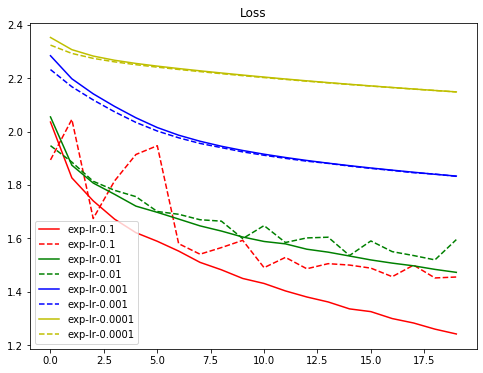

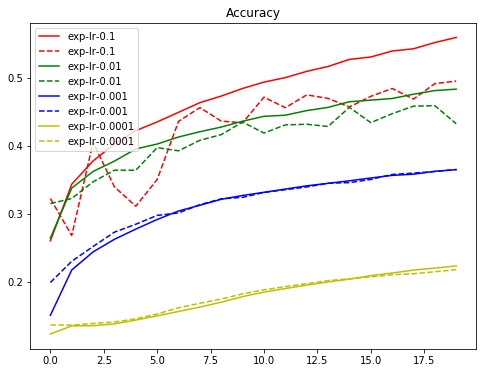

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

"""
將實驗結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()